# Importing Libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [4]:
dataset=pd.read_csv('C:\\Users\\USER\\Desktop\\nutrit\\nutrients_csvfile.csv')
dataset.head(4)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products


#  Data cleaning

In [5]:
dataset=dataset.replace("t",0)
dataset=dataset.replace("t'",0)
dataset.head(3)

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products


In [6]:
dataset=dataset.replace(",","", regex=True)
dataset['Fiber']=dataset['Fiber'].replace("a","", regex=True)
dataset['Calories'][91]=(8+44)/2

In [10]:
dataset['Grams']=pd.to_numeric(dataset['Grams'])
dataset['Calories']=pd.to_numeric(dataset['Calories'])
dataset['Protein']=pd.to_numeric(dataset['Protein'])
dataset['Fat']=pd.to_numeric(dataset['Fat'])
dataset['Sat.Fat']=pd.to_numeric(dataset['Sat.Fat'])
dataset['Fiber']=pd.to_numeric(dataset['Fiber'])
dataset['Carbs']=pd.to_numeric(dataset['Carbs'])

In [11]:
dataset.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein       int64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

In [12]:
dataset.shape

(335, 10)

# checking fo data quality

In [13]:
print(dataset.isnull().any())
print('-'*245)
print(dataset.describe())
print('-'*245)

Food        False
Measure     False
Grams       False
Calories     True
Protein     False
Fat         False
Sat.Fat      True
Fiber        True
Carbs       False
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             Grams     Calories     Protein         Fat     Sat.Fat  \
count   335.000000   334.000000  335.000000  335.000000  333.000000   
mean    143.211940   188.802395    8.573134    8.540299    6.438438   
std     138.668626   184.453018   17.733722   19.797871   18.517656   
min      11.000000     0.000000   -1.000000    0.000000    0.000000   
25%      60.000000    75.000000    1.000000    0.000000    0.000000   
50%     108.000000   131.000000    3.000000    1.000000    0.000000   
75%     200.000000   250.000000   12.000000   10.000000    8.0000

# Visualization

In [23]:
dataset_category = dataset.groupby(['Category']).sum()
dataset_category=dataset_category.reset_index()

In [28]:
column=["Grams","Calories","Protein","Fat","Sat.Fat","Fiber","Carbs"]
def get_numeric(dataset,column):
    dataset[column]= pd.to_numeric(dataset[column])

for i in range(len(column)):
    get_numeric(dataset,column[i])

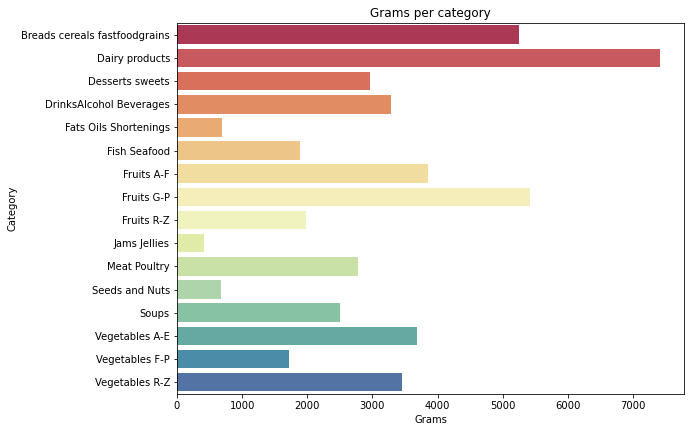

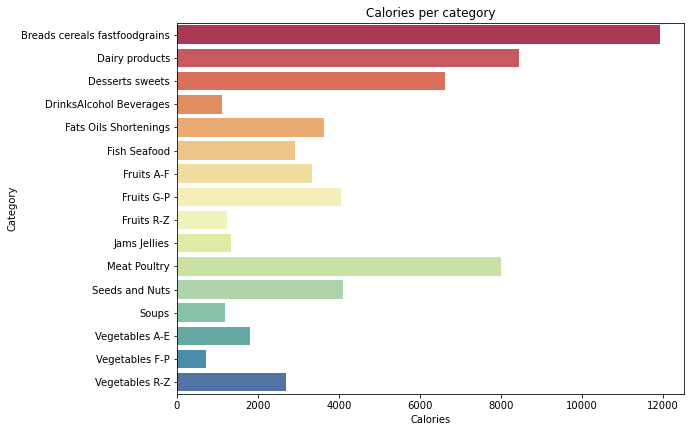

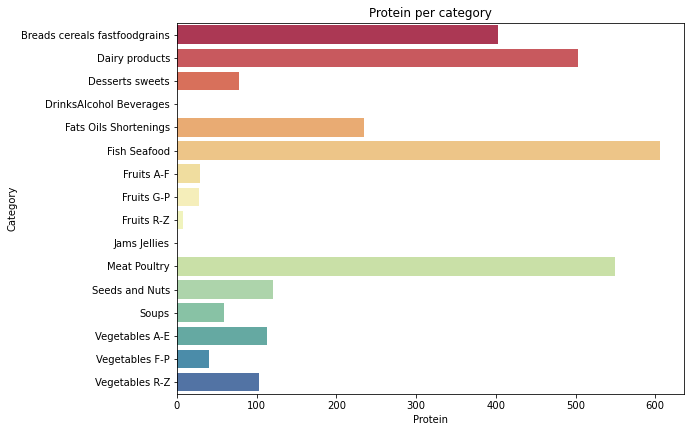

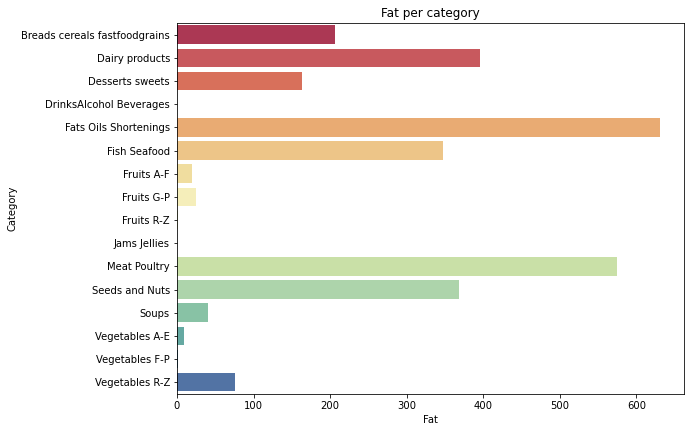

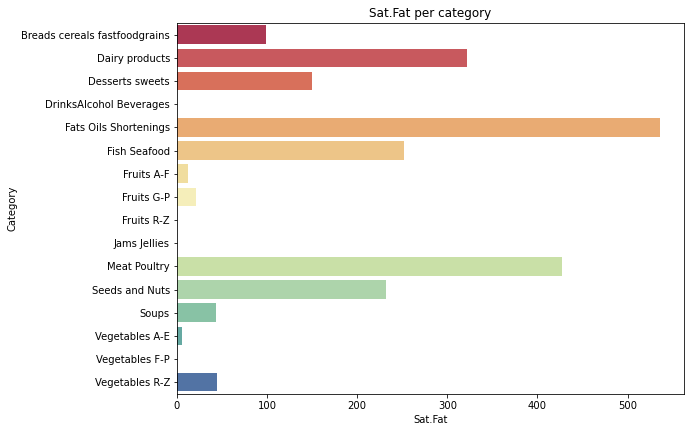

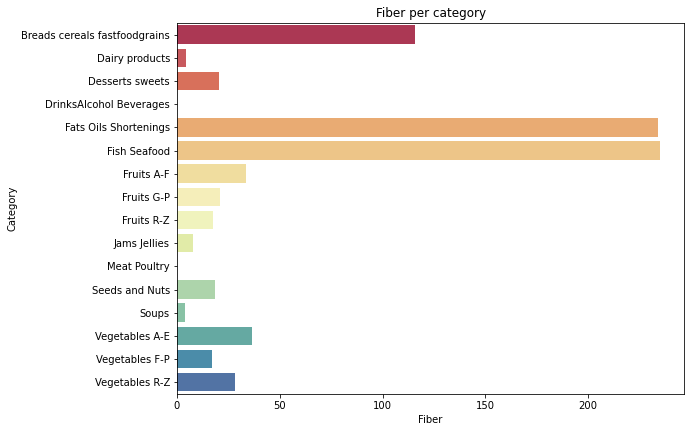

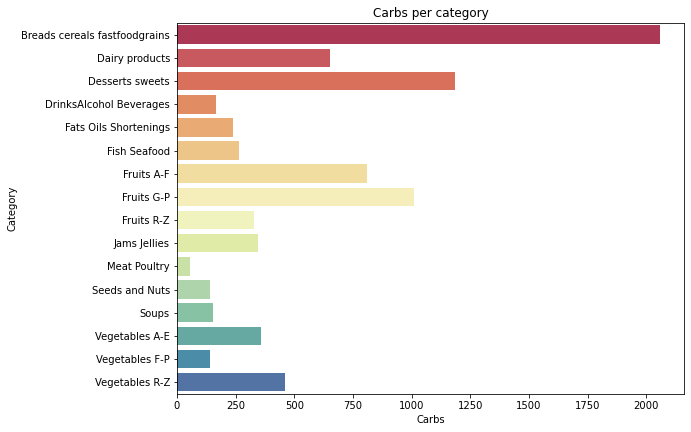

In [29]:
import sys
from pylab import *

def visual_category(dataset,column):
    #category vise visualisation per nutrient
    plt.figure(2, figsize=(20,15))
    the_grid = GridSpec(2, 2)
    plt.subplot(the_grid[0, 1],  title= '{} per category'.format(column))
    sns.barplot(x=column,y='Category', data=dataset_category, palette='Spectral')
    plt.show()
for i in range(len(column)):
    visual_category(dataset,column[i])